In [1]:
!pip install -q -U google-generativeai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 146.8/146.8 kB 1.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.5/664.5 kB 6.7 MB/s eta 0:00:00
ERROR: Operation cancelled by user


In [2]:
from google.colab import files
from PIL import Image
import matplotlib.pyplot as plt
import pathlib
import textwrap

import google.generativeai as genai

from IPython.display import display
from IPython.display import Markdown


In [3]:
def to_markdown(text):
  text = text.replace('•', '  *')
  return Markdown(textwrap.indent(text, '> ', predicate=lambda _: True))

In [4]:
# Or use `os.getenv('GOOGLE_API_KEY')` to fetch an environment variable.
genai.configure(api_key='<your api key>')

In [5]:
for m in genai.list_models():
  if 'generateContent' in m.supported_generation_methods:
    print(m.name)

models/gemini-1.0-pro
models/gemini-1.0-pro-001
models/gemini-1.0-pro-latest
models/gemini-1.0-pro-vision-latest
models/gemini-1.5-pro-latest
models/gemini-pro
models/gemini-pro-vision


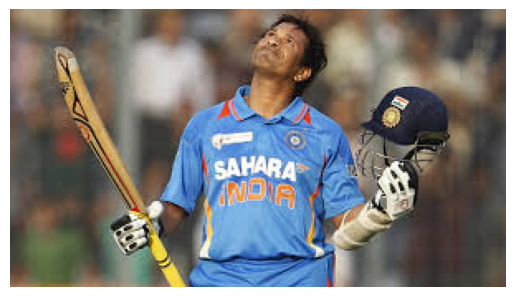

In [7]:
# Upload a file
uploaded = files.upload()

# # Get the uploaded image file name
uploaded_file_name = list(uploaded.keys())[0]

In [ ]:
# Load and display the uploaded image
img = Image.open(uploaded_file_name)
plt.imshow(img)
plt.axis('off')
plt.show()

In [8]:
model = genai.GenerativeModel('gemini-pro-vision')

In [9]:
response = model.generate_content(img)

to_markdown(response.text)

>  Sachin Ramesh Tendulkar (born 24 April 1973) is a former Indian cricketer widely regarded as one of the greatest batsmen in the history of the sport. He is the highest run scorer of all time in International cricket. Tendulkar took up cricket at the age of eleven and made his Test debut for India against Pakistan in 1989 at the age of sixteen. He scored his first Test century in 1990 against England. In 1994, he became the first Indian player to score a century in a World Cup match. Tendulkar was the leading run-scorer in the 2003 Cricket World Cup, and was named Player of the Tournament. He retired from international cricket in 2013, having scored 15,921 runs in Test cricket, 18,426 runs in One Day Internationals (ODIs), and 10,409 runs in Twenty20 Internationals (T20Is). Tendulkar is the only player to have scored more than 30,000 runs in international cricket. He is also the only player to have scored a century in each of the six major ICC tournaments (Test cricket, ODIs, T20Is, the Cricket World Cup, the ICC Champions Trophy, and the Indian Premier League). Tendulkar was awarded the Arjuna Award in 1994, the Padma Shri in 1999, the Khel Ratna in 2008, and the Padma Vibhushan in 2014. He was also named one of the Wisden Cricketers of the Year in 1997 and 2010. In 2012, he was inducted into the ICC Cricket Hall of Fame.

development of chating feature

In [10]:
model = genai.GenerativeModel('gemini-pro')
chat = model.start_chat(history=[])
chat

ChatSession(
    model=genai.GenerativeModel(
        model_name='models/gemini-pro',
        generation_config={},
        safety_settings={},
        tools=None,
        system_instruction=None,
    ),
    history=[]
)

In [11]:
response = chat.send_message(f"{response.text} generate me a instagram caption for this")
to_markdown(response.text)

> 🌟🏏 The Master Blaster 🌟🏏
> 
> Introducing the legendary Sachin Tendulkar, the greatest batsman in the history of cricket! 🐐
> 
> From his humble beginnings to becoming the highest run-scorer in international cricket, Sachin's journey is an inspiration to us all. 🏆
> 
> His unwavering determination, exceptional technique, and iconic sixes left an indelible mark on the sport. 🙏
> 
> From his Test debut at 16 to his last international match in 2013, Sachin captivated millions with his sheer brilliance and unmatched legacy. 🏏✨
> 
> Join us in celebrating the Maestro, the God of Cricket! 🙌 #SachinTendulkar #CricketLegend #MasterBlaster #Inspiration #GOAT

In [12]:
response = chat.send_message(f"give a short one")
to_markdown(response.text)

> 🌟 Sachin Tendulkar 🌟
> 
> The greatest batsman to ever grace the cricket field. 🏏🐐
> 
> From his Test debut at 16 to his iconic farewell in 2013, Sachin's journey is an inspiration to us all.
> 
> Join us in celebrating the Master Blaster! 🙌
> #SachinTendulkar #CricketLegend #MasterBlaster #GOAT

In [ ]:
chat.history

[parts {
   text: " The image is of a futuristic house with a large red spaceship hovering above it. The spaceship has a sleek design and large windows, and it appears to be hovering in mid-air. The house is also futuristic, with a modern design and large glass windows. The image is set in a beautiful landscape, with green trees and a blue sky. generate me a instagram caption for this"
 }
 role: "user",
 parts {
   text: "Prepare for liftoff! \360\237\233\270\360\237\217\241 This futuristic fusion of a sleek spaceship hovering over a cutting-edge abode is an out-of-this-world architectural marvel. The spaceship\'s elegant design and panoramic windows hint at an extraordinary journey, while the house\'s modern facade and glass walls blur the lines between the interior and the breathtaking landscape. Together, they create a surreal and awe-inspiring vision of the future. #SpaceboundArchitecture #FuturisticHomes #DesignInspo"
 }
 role: "model",
 parts {
   text: "give a short one"
 }
 rol